#  X Education Leads

With around 37 variables around a lead (prospective customer) we need to predict whether the lead is likely to convert or not, i.e. whether they will take a course with the X education company or not. For that we'll use lead score as the deciding parameter with values ranging from 0 to 100, a value closer to 100 meaning the lead is most likely to convert and vice versa.

Steps:-
- Import dataset
- Inspecting the dataset
- EDA: Understand the dataset
- Cleaning the Data: Treating missing values and outliers
- Perform OHE on clean data
- Split the data for validation
- Rescale variables
- Create Model
- Recursive Feature Elimination
- Manual feature elimination on the basis of P-value and VIF (If required)
- ROC curve to find optimal cutoff
- Evaluate the model on test dataset

### Step 1: Importing Data

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing important libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# Importing the dataset
DF_Leads = pd.read_csv("Leads.csv")

### Step 2: Inspecting the Dataframe

In [5]:
# Let's see the head of our master dataset
DF_Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Checking the dimensions of the dataframe
DF_Leads.shape

(9240, 37)

In [7]:
# The statistical aspects of the numerical features in the dataframe
DF_Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Checking the type of each column
DF_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Types of all variables look correct, no data manipulation needed here**

### Step 3: Exploratory Data Analysis

#### Univariate Analysis

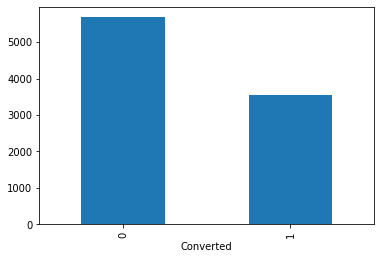

In [9]:
#Starting with the target variable, Converted

DF_Leads.groupby('Converted')['Converted'].count().plot(kind='bar')
plt.show()

*Inference: More than 5500 leads didn't convert, while less than 4000 did*

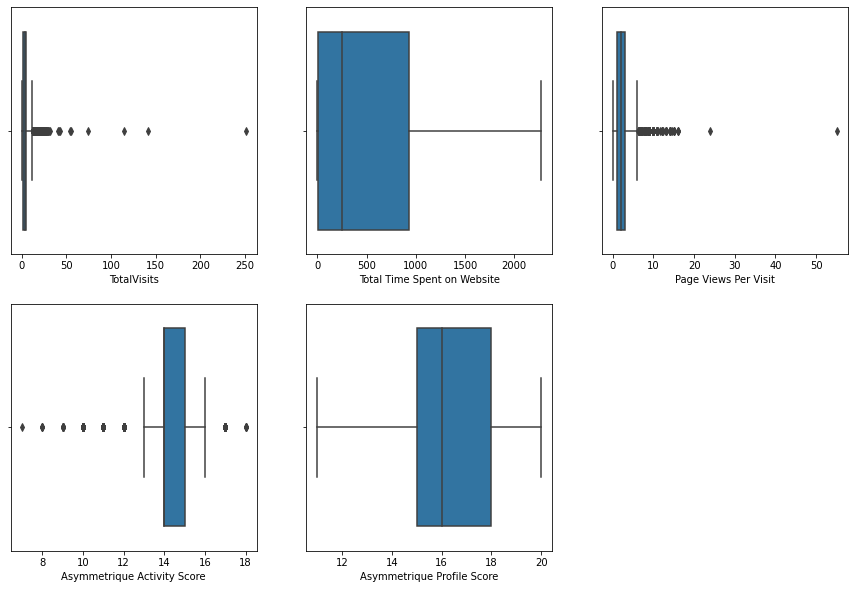

In [10]:
#Evaluting the numerical variables of the dataset

plt.figure(figsize=[15,10])
plt.subplot(231)
sns.boxplot(DF_Leads['TotalVisits'])
plt.subplot(232)
sns.boxplot(DF_Leads['Total Time Spent on Website'])
plt.subplot(233)
sns.boxplot(DF_Leads['Page Views Per Visit'])
plt.subplot(234)
sns.boxplot(DF_Leads['Asymmetrique Activity Score'])
plt.subplot(235)
sns.boxplot(DF_Leads['Asymmetrique Profile Score'])
plt.show()

*Inference:- Data in Total Visits, Page views per visit, and asymmetric activity score has outliers that may need fixing in later stages*

In [11]:
DF_Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
#Prospect ID and Lead Number, seem like unique identifiers for all records, let's test this

print("Percentage of unique values for Prospect ID: ", DF_Leads['Prospect ID'].nunique()/DF_Leads.shape[0]*100)
print("Percentage of unique values for Lead Number: ", DF_Leads['Lead Number'].nunique()/DF_Leads.shape[0]*100)

Percentage of unique values for Prospect ID:  100.0
Percentage of unique values for Lead Number:  100.0


Since our aim is to build a model to predict what factors contribute in conversion of a lead, unique identifiers are of no use to our model, let's drop them

In [13]:
#Dropping columns with unique values
DF_Leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

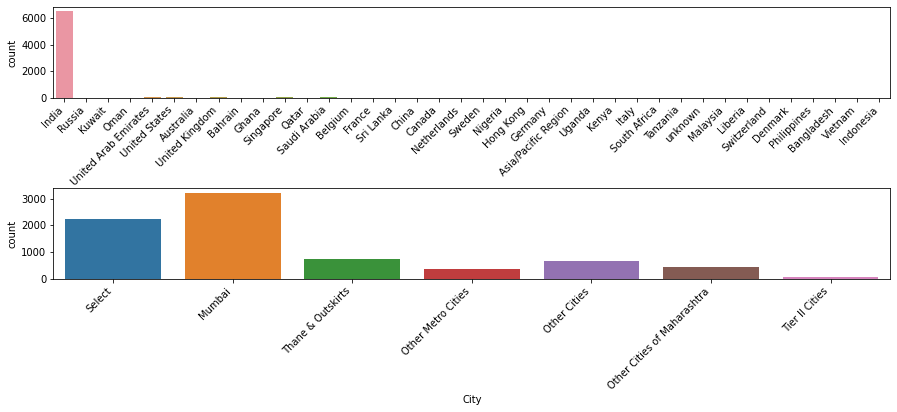

In [14]:
# Analyzing predictors - Last Activity, Country, Specialization, How did you hear about X Education, 
# What is your current occupation, What matters most to you in choosing a course

plt.figure(figsize=[15,5])
plt.subplots_adjust(hspace=1)

plt.subplot(211)
sns.countplot(DF_Leads['Country'])
plt.xticks(rotation=45, ha='right')

plt.subplot(212)
sns.countplot(DF_Leads['City'])
plt.xticks(rotation=45, ha='right')

plt.show()

*Inference:- Most of the data in country is from India, this would create a skewed dataset, besides it won't give much value to the model and would result in too many dummy variables if treated with OHE, hence it's better to remove it right away*

In [15]:
#Dropping Country column

DF_Leads.drop('Country', axis=1, inplace=True)

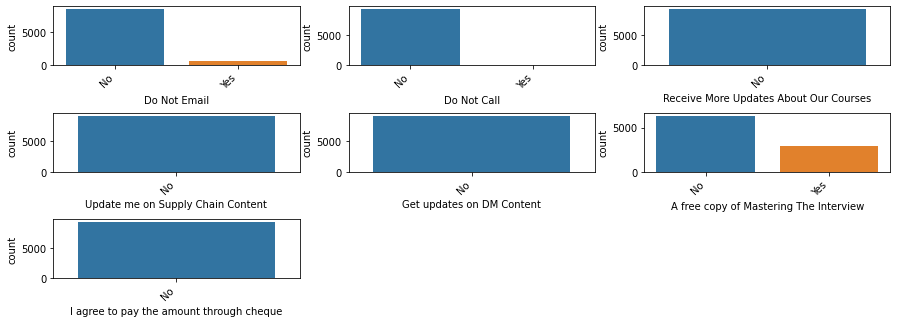

In [16]:
# Analyzing predictors - Last Activity, Country, Specialization, How did you hear about X Education, 
# What is your current occupation, What matters most to you in choosing a course

plt.figure(figsize=[15,5])
plt.subplots_adjust(hspace=0.8)

plt.subplot(331)
sns.countplot(DF_Leads['Do Not Email'])
plt.xticks(rotation=45, ha='right')

plt.subplot(332)
sns.countplot(DF_Leads['Do Not Call'])
plt.xticks(rotation=45, ha='right')

plt.subplot(333)
sns.countplot(DF_Leads['Receive More Updates About Our Courses'])
plt.xticks(rotation=45, ha='right')
                       
plt.subplot(334)
sns.countplot(DF_Leads['Update me on Supply Chain Content'])
plt.xticks(rotation=45, ha='right')

plt.subplot(335)
sns.countplot(DF_Leads['Get updates on DM Content'])
plt.xticks(rotation=45, ha='right')

plt.subplot(336)
sns.countplot(DF_Leads['A free copy of Mastering The Interview'])
plt.xticks(rotation=45, ha='right') 

plt.subplot(337)
sns.countplot(DF_Leads['I agree to pay the amount through cheque'])
plt.xticks(rotation=45, ha='right') 

plt.show()

*Inference:*
- Some variables have only just one of the boolean values, they won't give much value to the model and would result in redundant dummy variables if treated with OHE, hence it's better to remove them right away
- Students are almost always choosing no as the option for columns like recieving more course updates, updates on supply chain, getting updates on DM, and paying the amount through check, it's better to remove these columns from the forms, or if they have some business value, then give some incentives to the users for better conversion here.

In [17]:
#Dropping columns with only one boolean value

DF_Leads.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1, inplace=True)

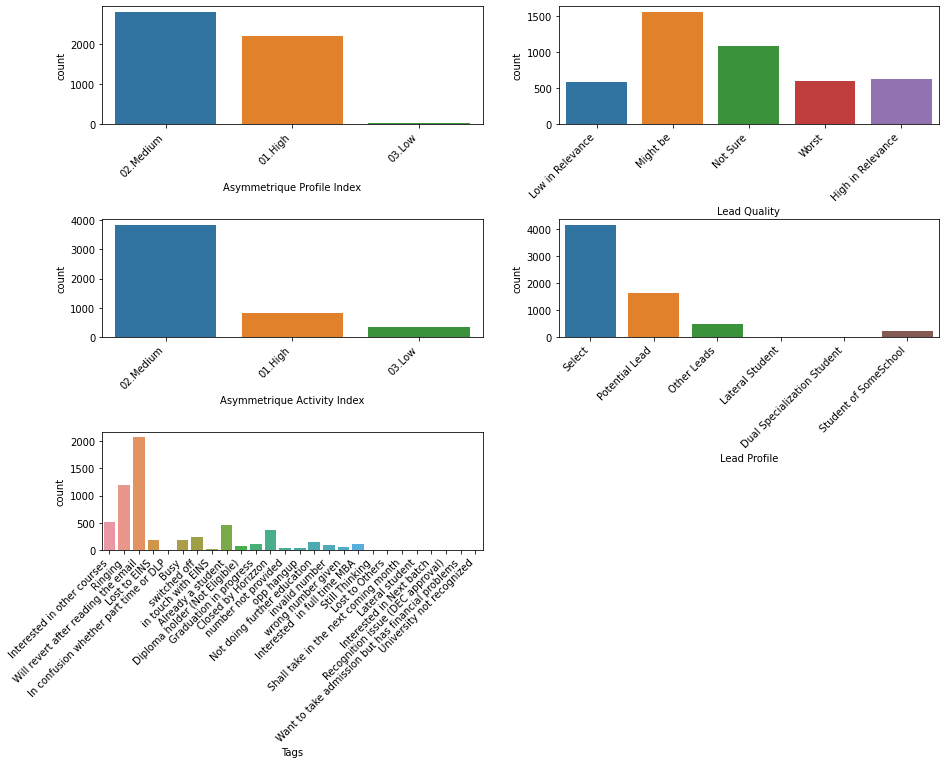

In [18]:
# Analyzing predictors - Last Activity, Country, Specialization, How did you hear about X Education, 
# What is your current occupation, What matters most to you in choosing a course

plt.figure(figsize=[15,10])
plt.subplots_adjust(hspace=0.8)

plt.subplot(321)
sns.countplot(DF_Leads['Asymmetrique Profile Index'])
plt.xticks(rotation=45, ha='right')

plt.subplot(322)
sns.countplot(DF_Leads['Lead Quality'])
plt.xticks(rotation=45, ha='right')

plt.subplot(323)
sns.countplot(DF_Leads['Asymmetrique Activity Index'])
plt.xticks(rotation=45, ha='right')

plt.subplot(324)
sns.countplot(DF_Leads['Lead Profile'])
plt.xticks(rotation=45, ha='right')

plt.subplot(325)
sns.countplot(DF_Leads['Tags'])
plt.xticks(rotation=45, ha='right')

plt.show()

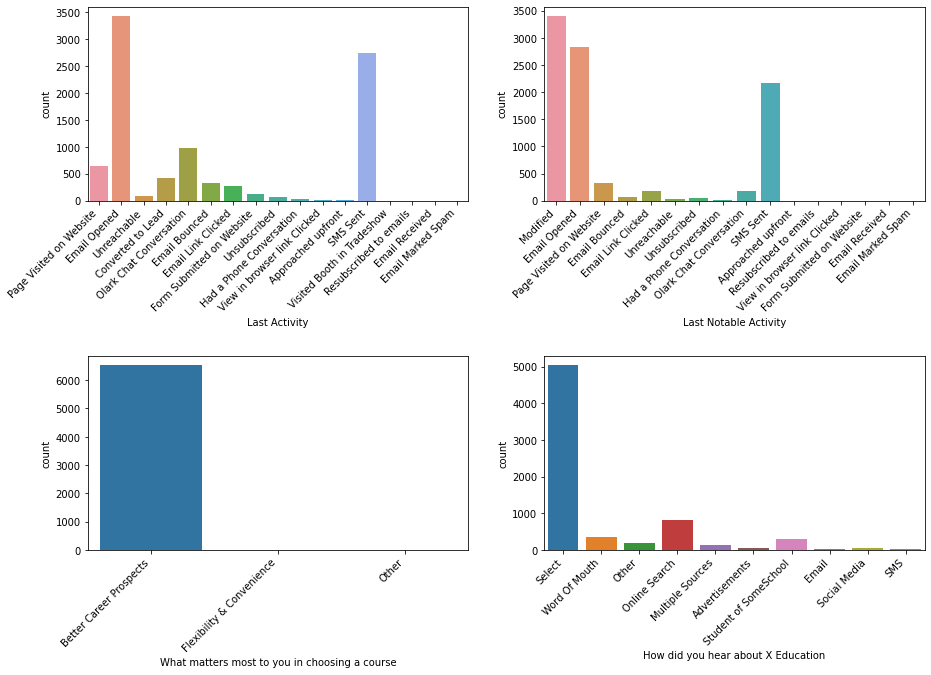

In [19]:
# Analyzing predictors - Last Activity, Country, Specialization, How did you hear about X Education, 
# What is your current occupation, What matters most to you in choosing a course

plt.figure(figsize=[15,10])
plt.subplots_adjust(hspace=0.8)

plt.subplot(221)
sns.countplot(DF_Leads['Last Activity'])
plt.xticks(rotation=45, ha='right')

plt.subplot(222)
sns.countplot(DF_Leads['Last Notable Activity'])
plt.xticks(rotation=45, ha='right')

plt.subplot(223)
sns.countplot(DF_Leads['What matters most to you in choosing a course'])
plt.xticks(rotation=45, ha='right')

plt.subplot(224)
sns.countplot(DF_Leads['How did you hear about X Education'])
plt.xticks(rotation=45, ha='right')


plt.show()

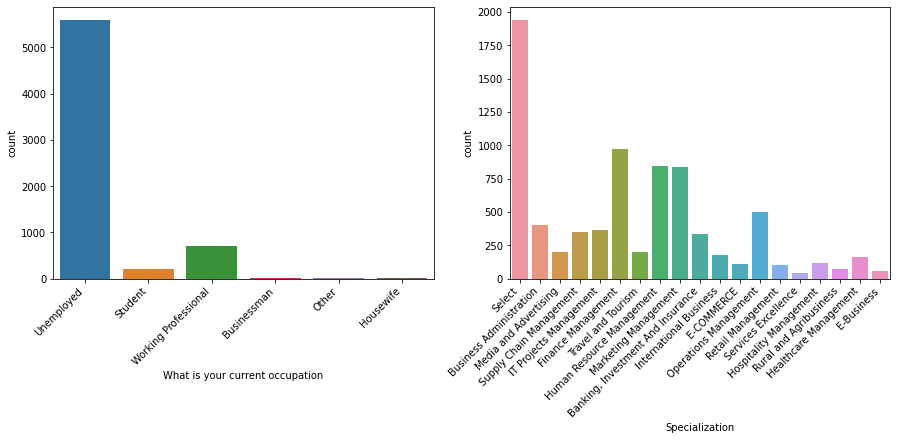

In [20]:
# Analyzing predictors - Last Activity, Country, Specialization, How did you hear about X Education, 
# What is your current occupation, What matters most to you in choosing a course

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(DF_Leads['What is your current occupation'])
plt.xticks(rotation=45, ha='right')

plt.subplot(122)
sns.countplot(DF_Leads['Specialization'])
plt.xticks(rotation=45, ha='right')

plt.show()

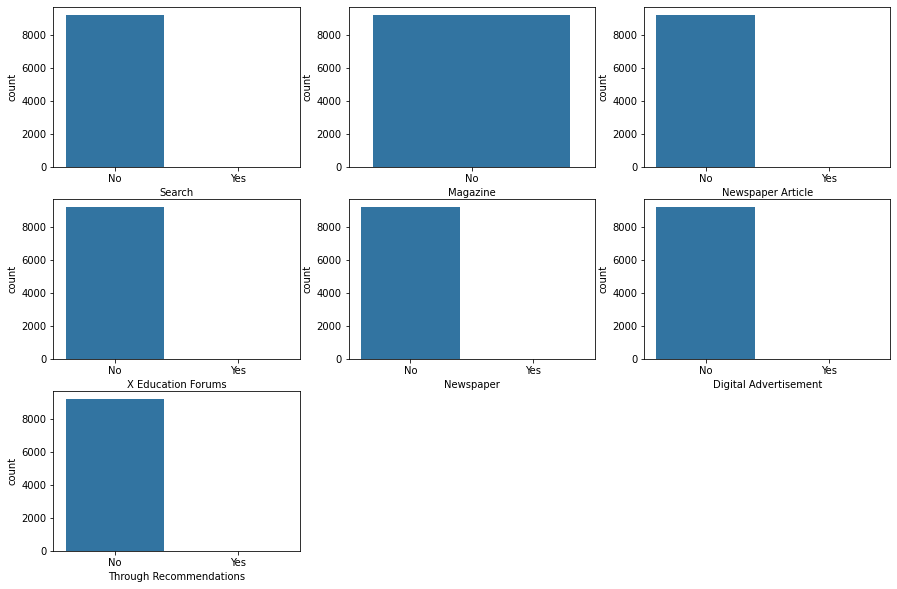

In [21]:
plt.figure(figsize=[15,10])

plt.subplot(331)
sns.countplot(DF_Leads['Search'])

plt.subplot(332)
sns.countplot(DF_Leads['Magazine'])

plt.subplot(333)
sns.countplot(DF_Leads['Newspaper Article'])

plt.subplot(334)
sns.countplot(DF_Leads['X Education Forums'])

plt.subplot(335)
sns.countplot(DF_Leads['Newspaper'])

plt.subplot(336)
sns.countplot(DF_Leads['Digital Advertisement'])

plt.subplot(337)
sns.countplot(DF_Leads['Through Recommendations'])

*Inference:*
- Magazine column has only just one of the boolean values, it won't give much value to the model and would result in redundant dummy variables if treated with OHE, hence it's better to remove it right away
- The information available here isn't enough to find out from where are students learning about X-education, they're either not filling this particular column as carefully, or there needs to be more options.

In [22]:
#Dropping columns with only one boolean value

DF_Leads.drop('Magazine', axis=1, inplace=True)

#### Bivariate Analysis

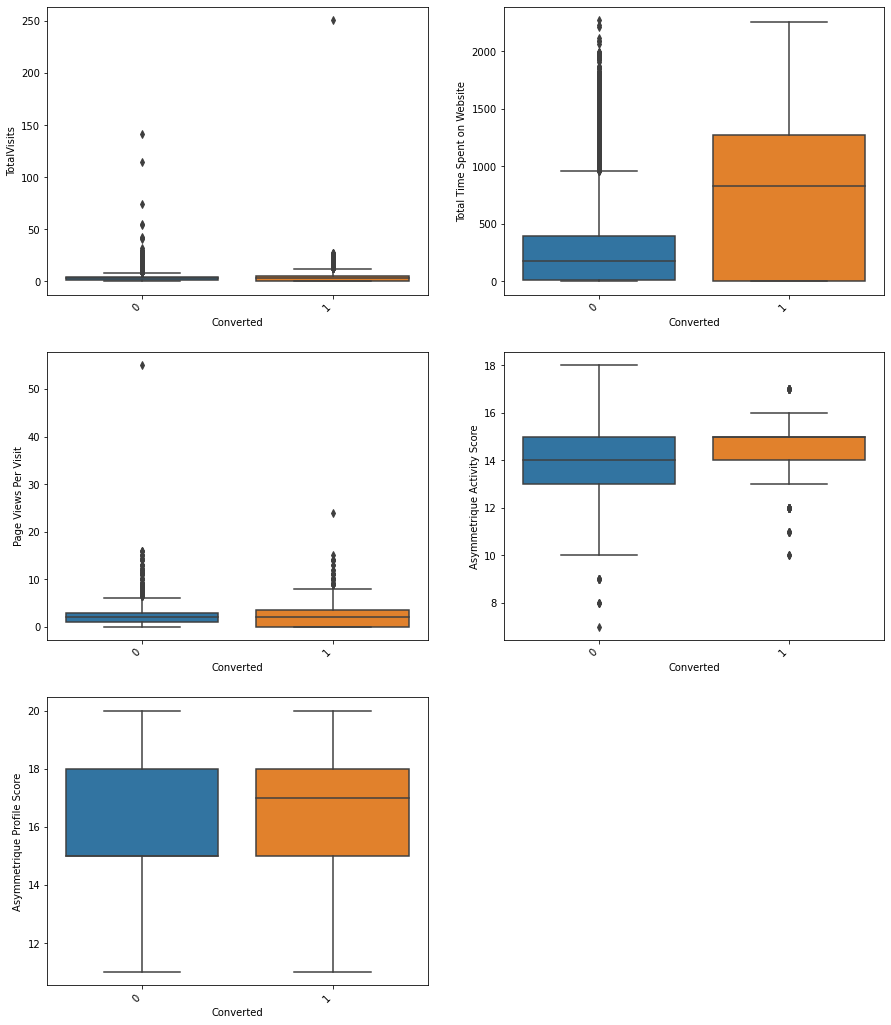

In [23]:
plt.figure(figsize=[15,18])
plt.subplots_adjust(hspace=0.2)

plt.subplot(321)
sns.boxplot(y=DF_Leads['TotalVisits'], x=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(322)
sns.boxplot(y=DF_Leads['Total Time Spent on Website'], x=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(323)
sns.boxplot(y=DF_Leads['Page Views Per Visit'], x=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right') 

plt.subplot(324)
sns.boxplot(y=DF_Leads['Asymmetrique Activity Score'], x=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right') 

plt.subplot(325)
sns.boxplot(y=DF_Leads['Asymmetrique Profile Score'], x=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right') 

plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

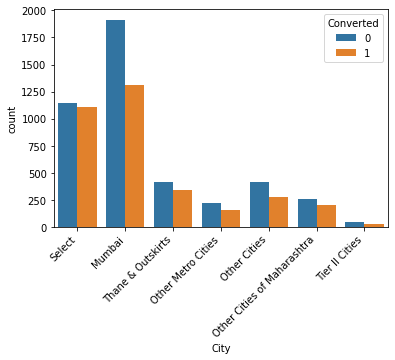

In [24]:
sns.countplot(DF_Leads['City'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

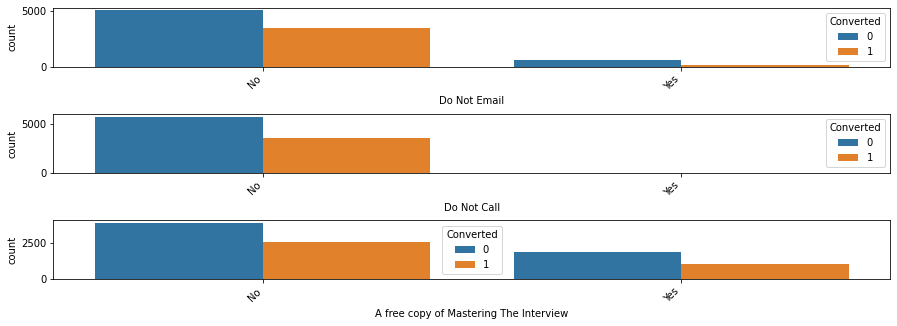

In [25]:
plt.figure(figsize=[15,5])
plt.subplots_adjust(hspace=0.8)

plt.subplot(311)
sns.countplot(DF_Leads['Do Not Email'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(312)
sns.countplot(DF_Leads['Do Not Call'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(313)
sns.countplot(DF_Leads['A free copy of Mastering The Interview'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right') 

plt.show()

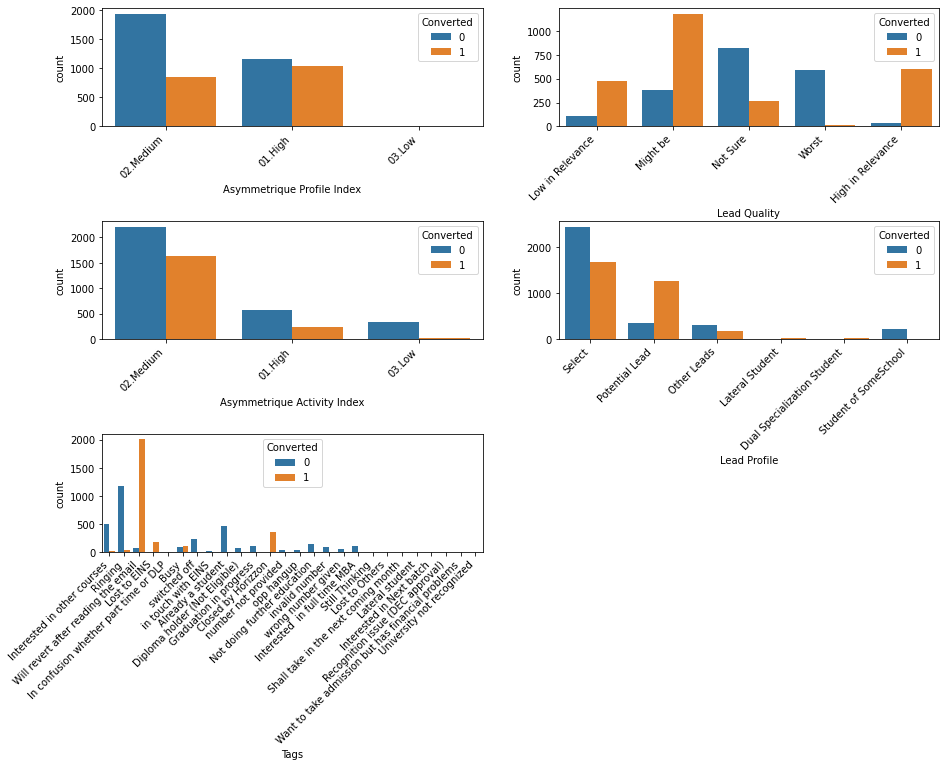

In [26]:
plt.figure(figsize=[15,10])
plt.subplots_adjust(hspace=0.8)

plt.subplot(321)
sns.countplot(DF_Leads['Asymmetrique Profile Index'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(322)
sns.countplot(DF_Leads['Lead Quality'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(323)
sns.countplot(DF_Leads['Asymmetrique Activity Index'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(324)
sns.countplot(DF_Leads['Lead Profile'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(325)
sns.countplot(DF_Leads['Tags'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.show()

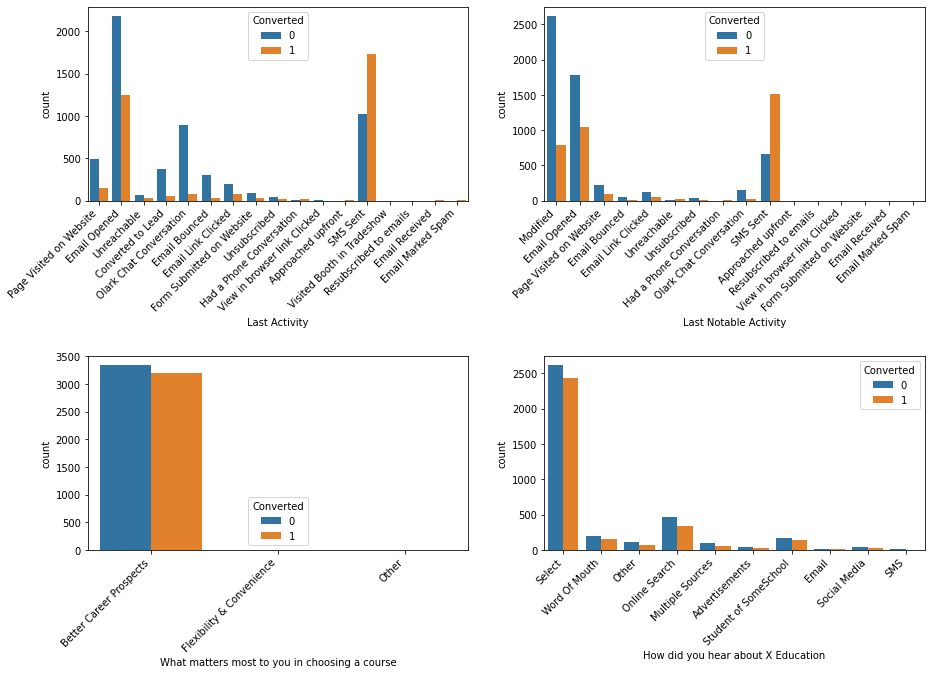

In [27]:
plt.figure(figsize=[15,10])
plt.subplots_adjust(hspace=0.8)

plt.subplot(221)
sns.countplot(DF_Leads['Last Activity'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(222)
sns.countplot(DF_Leads['Last Notable Activity'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(223)
sns.countplot(DF_Leads['What matters most to you in choosing a course'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(224)
sns.countplot(DF_Leads['How did you hear about X Education'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.show()

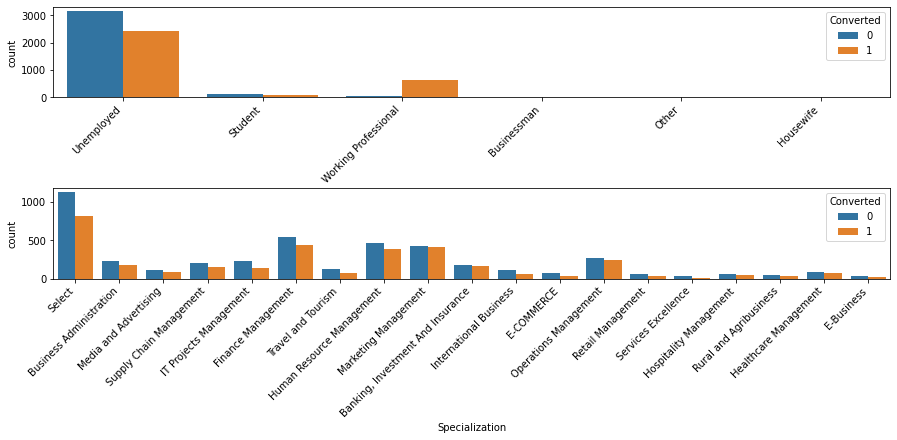

In [28]:
plt.figure(figsize=[15,5])
plt.subplots_adjust(hspace=1)

plt.subplot(211)
sns.countplot(DF_Leads['What is your current occupation'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.subplot(212)
sns.countplot(DF_Leads['Specialization'], hue=DF_Leads.Converted)
plt.xticks(rotation=45, ha='right')

plt.show()

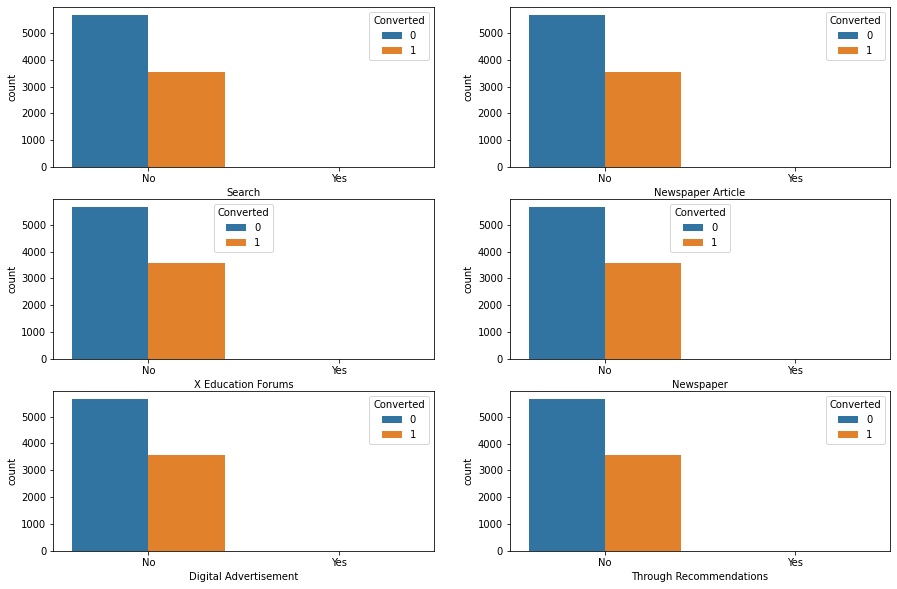

In [29]:
plt.figure(figsize=[15,10])

plt.subplot(321)
sns.countplot(DF_Leads['Search'], hue=DF_Leads.Converted)

plt.subplot(322)
sns.countplot(DF_Leads['Newspaper Article'], hue=DF_Leads.Converted)

plt.subplot(323)
sns.countplot(DF_Leads['X Education Forums'], hue=DF_Leads.Converted)

plt.subplot(324)
sns.countplot(DF_Leads['Newspaper'], hue=DF_Leads.Converted)

plt.subplot(325)
sns.countplot(DF_Leads['Digital Advertisement'], hue=DF_Leads.Converted)

plt.subplot(326)
sns.countplot(DF_Leads['Through Recommendations'], hue=DF_Leads.Converted)

### Step 4: Data Cleaning

#### Computing all Null Values

In [30]:
'''Before treating the null values we have to fix the 'select' values for all the columns, because they're as good 
as a null values. It is the default option a user submits when he does not 'select' anything from the drop down options.'''

#Finding out which columns have 'Select' or 'select'
DF_Leads.columns[DF_Leads.isin(['Select','select']).any() == True]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [31]:
#Replacing all the instances with NaN

DF_Leads.replace(to_replace =['Select','select'], value = np.nan, inplace=True)

#Verifying the previous step
DF_Leads.columns[DF_Leads.isin(['Select','select']).any() == True]

Index([], dtype='object')

#### Finding and treating null values

In [32]:
DF_Leads.isnull().sum()/len(DF_Leads)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

##### Treating Null Values

In [33]:
DF_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [34]:
#Treating the largest null values holder predictor

DF_Leads['How did you hear about X Education'].value_counts(normalize=True, dropna=False)

NaN                      0.784632
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: How did you hear about X Education, dtype: float64

*Inference: Online Search is the biggest contributor in brand awareness, that being said this variable has too many null values, also as seen in the Bivariate analysis, this isn't resourceful for model building, so we're going to drop it*

In [35]:
#Dropping 'How did you hear about X Education'

DF_Leads.drop(['How did you hear about X Education'], axis=1, inplace=True)

In [36]:
DF_Leads.columns[(DF_Leads.isnull().sum()/len(DF_Leads)*100 > 0) & (DF_Leads.dtypes=='object')]

Index(['Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index'],
      dtype='object')

Remainder of the columns, except *Asymmetrique Activity Index*, with null values can prove to be important in model building as is visible in the bivariate analysis, so we're going to impute them instead, dropping only *Asymmetrique Profile Index*

In [37]:
#Dropping 'Asymmetrique Activity Index', and 'Asymmetrique Profile Index'

DF_Leads.drop(['Asymmetrique Activity Index'], axis=1, inplace=True)
DF_Leads.drop(['Asymmetrique Profile Index'], axis=1, inplace=True)

#Imputing the missing values with a new category for remainder of the columns

DF_Leads['Lead Profile'].fillna('Unnamed profile', inplace=True)

DF_Leads['Lead Quality'].fillna('Unknown Relevance', inplace=True)

DF_Leads['Specialization'].fillna('Unknown Specialization', inplace=True)

DF_Leads['What is your current occupation'].fillna('Unknown Occupation', inplace=True),
       
DF_Leads['What matters most to you in choosing a course'].fillna('Unknown Preference', inplace=True)

DF_Leads['Tags'].fillna('No tags', inplace=True)
         
DF_Leads['City'].fillna('Unknown City', inplace=True)

DF_Leads['Lead Source'].fillna('Unknown Source', inplace=True)
         
DF_Leads['Last Activity'].fillna('Unknown Last Activity', inplace=True)


In [38]:
DF_Leads.isnull().sum()/len(DF_Leads)*100

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     0.000000
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

In [39]:
# As seen in bivariate analysis *Asymmetrique Profile Score* is important predictor so we'll impute it instead, dropping *Asymmetrique Activity Score*
DF_Leads.drop(['Asymmetrique Activity Score'], axis = 1, inplace=True)

DF_Leads['Asymmetrique Profile Score'].fillna(DF_Leads['Asymmetrique Profile Score'].median(), inplace=True)

In [40]:
# Understanding and treating missing values for 'TotalVisits' and 'Page Views Per Visit'
DF_Leads[(DF_Leads['Page Views Per Visit'].isnull()) | (DF_Leads['TotalVisits'].isnull())]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
77,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,Unknown Last Activity,Unknown Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No tags,Unknown Relevance,Unnamed profile,Unknown City,15.0,No,Modified
79,Lead Add Form,Reference,No,No,1,NaN,705,NaN,Unknown Last Activity,Hospitality Management,Working Professional,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,Potential Lead,Thane & Outskirts,16.0,No,Modified
81,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,Unknown Last Activity,Unknown Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No tags,Unknown Relevance,Unnamed profile,Unknown City,15.0,No,Modified
88,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,Unknown Last Activity,Human Resource Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,Lateral Student,Mumbai,20.0,No,Modified
120,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,Unknown Last Activity,Marketing Management,Working Professional,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Low in Relevance,Potential Lead,Other Cities,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,Unknown Last Activity,Marketing Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in full time MBA,Not Sure,Unnamed profile,Unknown City,18.0,No,Modified
8107,Lead Add Form,Reference,No,No,1,NaN,903,NaN,Unknown Last Activity,"Banking, Investment And Insurance",Working Professional,Better Career Prospects,No,No,No,No,No,No,Lost to EINS,Might be,Potential Lead,Unknown City,19.0,No,Modified
8434,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,Unknown Last Activity,Unknown Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,Unnamed profile,Unknown City,17.0,No,Modified
9015,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,Unknown Last Activity,Supply Chain Management,Working Professional,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Low in Relevance,Potential Lead,Mumbai,20.0,No,Modified


Through subject understanding, we know that if a user has disabled cookies on their web browser, these data points won't get recorded. Since, this data has significant value for Converted column, we cannot simply drop the missing value entries from here. We'll instead impute it with the median value of the variables.

In [41]:
# Imputing the missing values with median
DF_Leads['TotalVisits'].fillna(DF_Leads['TotalVisits'].median(), inplace=True)
DF_Leads['Page Views Per Visit'].fillna(DF_Leads['Page Views Per Visit'].median(), inplace=True)

In [42]:
DF_Leads.isnull().sum()/len(DF_Leads)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Tags                                          

#### Treating Outliers
As were found during univariate analysis

In [43]:
#Checking outliers for Total Visits, Page views per visit, and asymmetric activity score to then treat them
DF_Leads[['TotalVisits','Page Views Per Visit']].quantile([0, 0.05, 0.25,0.5,0.75, 0.9, 1])

,TotalVisits,Page Views Per Visit
0.00,0.0,0.0
0.05,0.0,0.0
0.25,1.0,1.0
0.50,3.0,2.0
0.75,5.0,3.0
0.90,7.0,5.0
1.00,251.0,55.0


Data in Total Visits, Page views per visit have extreme outliers and need to be fixed before making the model*

In [44]:
#Capping the columns at 90th percentile3

upper_limit_TotalVisits = DF_Leads['TotalVisits'].quantile(0.9)
DF_Leads['TotalVisits'] = DF_Leads['TotalVisits'].apply(lambda x: upper_limit_TotalVisits if x > upper_limit_TotalVisits else x)

upper_limit_PageViewsPerVisit = DF_Leads['Page Views Per Visit'].quantile(0.9)
DF_Leads['Page Views Per Visit'] = DF_Leads['Page Views Per Visit'].apply(lambda x: upper_limit_PageViewsPerVisit if x > upper_limit_PageViewsPerVisit  else x)

#Checking them again
DF_Leads[['TotalVisits','Page Views Per Visit']].quantile([0, 0.05, 0.25,0.5,0.75, 0.9, 1])

,TotalVisits,Page Views Per Visit
0.00,0.0,0.0
0.05,0.0,0.0
0.25,1.0,1.0
0.50,3.0,2.0
0.75,5.0,3.0
0.90,7.0,5.0
1.00,7.0,5.0


In [45]:
DF_Leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

### Step 5: Feature Engineering

#### Converting the binary variables (Yes/No) to 1/0

In [46]:
# List of variables to map

varlist =  DF_Leads.columns[(DF_Leads.nunique()==2) & (DF_Leads.dtypes==object)]
varlist

Index(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [47]:
DF_Leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [48]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
DF_Leads[varlist] = DF_Leads[varlist].apply(binary_map)

DF_Leads.columns[(DF_Leads.nunique()==2) & (DF_Leads.dtypes==object)]

Index([], dtype='object')

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [49]:
DF_Leads.nunique()[DF_Leads.dtypes==object]

Lead Origin                                       5
Lead Source                                      22
Last Activity                                    18
Specialization                                   19
What is your current occupation                   7
What matters most to you in choosing a course     4
Tags                                             27
Lead Quality                                      6
Lead Profile                                      6
City                                              7
Last Notable Activity                            16
dtype: int64

In [50]:
dummy_var = DF_Leads.columns[DF_Leads.dtypes=='object']
dummy_var

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Last Notable Activity'],
      dtype='object')

In [51]:
# Creating dummy variable for some of the categorical variables and dropping the first one.
DF_Leads_OHE = pd.get_dummies(DF_Leads[dummy_var], drop_first=True)

# Adding the results to the master dataframe
DF_Leads = pd.concat([DF_Leads, DF_Leads_OHE], axis=1)

In [52]:
DF_Leads.shape

(9240, 151)

In [53]:
# Dropping categorical variables for which we have created the dummy variables already

DF_Leads.drop(dummy_var, axis=1, inplace=True)

In [54]:
DF_Leads.shape

(9240, 140)

In [55]:
DF_Leads.isnull().sum()[(DF_Leads.isnull().sum()/len(DF_Leads)*100) > 1 ]

Series([], dtype: int64)

In [56]:
DF_Leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 140 columns):
 #   Column                                                                   Dtype  
---  ------                                                                   -----  
 0   Do Not Email                                                             int64  
 1   Do Not Call                                                              int64  
 2   Converted                                                                int64  
 3   TotalVisits                                                              float64
 4   Total Time Spent on Website                                              int64  
 5   Page Views Per Visit                                                     float64
 6   Search                                                                   int64  
 7   Newspaper Article                                                        int64  
 8   X Education Forums         

### Step 6: Test-Train Split

In [57]:
# Putting feature variable to X
X = DF_Leads.drop(['Converted'], axis=1)
y = DF_Leads['Converted']

In [58]:
col_names = X.columns
col_names

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=139)

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=100)

### Step 7: Feature Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train, columns=col_names)
X_train_scaled.index = X_train.index
X_train = X_train_scaled
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown Source,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown Relevance,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unnamed profile,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown City,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5676,0,0,3.0,75,1.5,0,0,0,0,0,0,16.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6084,0,0,0.0,0,0.0,0,0,0,0,0,0,16.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1939,0,0,2.0,530,2.0,0,0,0,0,0,0,16.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4977,1,0,6.0,1047,5.0,0,0,0,0,0,0,16.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4561,0,0,0.0,0,0.0,0,0,0,0,0,0,19.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [62]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown Source,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown Relevance,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unnamed profile,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown City,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.0,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.0,4620.0,4620.000000,4620.000000,4620.000000,...,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.0,4620.000000,4620.000000,4620.000000,4620.0
mean,0.080952,0.000433,2.949351,481.312121,2.171630,0.001732,0.000433,0.000216,0.000216,0.000433,0.001299,16.197186,0.310173,0.525541,0.080952,0.004329,0.0,0.273593,0.004545,0.313420,0.000216,0.000216,0.191558,0.120346,0.000216,0.000216,0.062338,0.013203,0.000433,0.003247,0.000216,0.014286,0.000216,0.000216,0.000866,0.0,0.0,0.000216,0.047186,0.037879,...,0.000216,0.000866,0.219697,0.001732,0.008658,0.003247,0.003680,0.029654,0.004978,0.059957,0.167100,0.118398,0.521645,0.062554,0.003030,0.046970,0.177273,0.026407,0.743290,0.075974,0.047835,0.041558,0.078788,0.008225,0.407143,0.006277,0.018398,0.000216,0.304762,0.000216,0.000216,0.001515,0.369697,0.019264,0.036580,0.0,0.234632,0.003463,0.004762,0.0
std,0.272791,0.020804,2.325725,547.026183,1.652652,0.041581,0.020804,0.014712,0.014712,0.020804,0.036018,1.341896,0.462614,0.499401,0.272791,0.065660,0.0,0.445851

### Step 8: Model Building

#### Creating and Running the First Training Model

In [63]:
import statsmodels.api as sm

In [64]:
y_train.shape

(4620,)

In [65]:
X_train_1 = sm.add_constant(X_train)

In [66]:
# Logistic regression model

model1 = sm.GLM(y_train, X_train_1, family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4620
Model:                            GLM   Df Residuals:                     4489
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 08 Sep 2021   Deviance:                          nan
Time:                        18:19:07   Pearson chi2:                 2.91e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    3.654e+15   9.02e+07   4.05e+07      0.000    3.65e+15    3.65e+15
Do Not Email                                                             -3.32e+14    5.3e+06  -6.27e+07      0.000   -3.32e+14   -3.32e+14
Do Not Call                                                               2.46e+15    4.8e+07   5.12e+07      0.000    2.46e+15    2.46e+15
TotalVisits                                                               3.94e+13   8.46e+05   4.66e+07      0.000    3.94e+13    3.94e+13
Total Time Spent on Website                                               6.13e+11   2243.306   2.73e+08      0.000    6.13e+11    6.13e+11
Page Views Per Visit                                                    -6.927e+13   1.25e+06  -5.56e+07      0.000   -6.93e+13   -6.93e+13
Search                                                                   8.133e+14   2.73e+07   2.98e+07      0.000    8.13e+14    8.13e+14
Newspaper Article                                                        4.226e+15   6.76e+07   6.25e+07      0.000    4.23e+15    4.23e+15
X Education Forums                                                      -5.137e+15   1.24e+08  -4.16e+07      0.000   -5.14e+15   -5.14e+15
Newspaper                                                               -3.952e+15   6.77e+07  -5.84e+07      0.000   -3.95e+15   -3.95e+15
Digital Advertisement                                                   -3.841e+15   6.97e+07  -5.51e+07      0.000   -3.84e+15   -3.84e+15
Through Recommendations                                                 -2.415e+14   3.25e+07  -7.44e+06      0.000   -2.42e+14   -2.42e+14
Asymmetrique Profile Score                                              -3.898e+13   1.16e+06  -3.36e+07      0.000    -3.9e+13    -3.9e+13
A free copy of Mastering The Interview                                   -7.95e+13   3.33e+06  -2.38e+07      0.000   -7.95e+13   -7.95e+13
Lead Origin_Landing Page Submission                                     -3.989e+13   4.85e+06  -8.23e+06      0.000   -3.99e+13   -3.99e+13
Lead Origin_Lead Add Form                                               -4.648e+14   4.87e+07  -9.55e+06      0.000   -4.65e+14   -4.65e+14
Lead Origin_Lead Import                                                  2.626e+15   7.02e+07   3.74e+07      0.000    2.63e+15    2.63e+15
Lead Origin_Quick Add Form                                                -13.2300   7.21e-07  -1.83e+07      0.000     -13.230     -13.230
Lead Source_Direct Traffic                                              -1.429e+15   7.06e+07  -2.02e+07      0.000   -1.43e+15   -1.43e+15
Lea

### Step 9: Feature Selection Using RFE

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [68]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_1, y_train)

In [69]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False,  True, False,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [70]:
list(zip(X_train_1.columns, rfe.support_, rfe.ranking_))

[('const', False, 71),
 ('Do Not Email', False, 4),
 ('Do Not Call', False, 74),
 ('TotalVisits', False, 63),
 ('Total Time Spent on Website', False, 110),
 ('Page Views Per Visit', False, 62),
 ('Search', False, 16),
 ('Newspaper Article', False, 101),
 ('X Education Forums', False, 82),
 ('Newspaper', False, 105),
 ('Digital Advertisement', False, 53),
 ('Through Recommendations', False, 95),
 ('Asymmetrique Profile Score', False, 94),
 ('A free copy of Mastering The Interview', False, 103),
 ('Lead Origin_Landing Page Submission', False, 50),
 ('Lead Origin_Lead Add Form', False, 60),
 ('Lead Origin_Lead Import', False, 29),
 ('Lead Origin_Quick Add Form', False, 120),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 84),
 ('Lead Source_Live Chat', False, 107),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', False, 31),
 ('Lead Source_Organic Search', False, 83),
 ('Lead Source_Pay per Click Ads', False, 1

In [71]:
col = X_train_1.columns[rfe.support_]

In [72]:
X_train_1.columns[~rfe.support_]

Index(['const', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=120)

##### Assessing the model 2 with StatsModels

In [73]:
X_train_2 = sm.add_constant(X_train_1[col])
model2 = sm.GLM(y_train, X_train_2, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4620
Model:                            GLM   Df Residuals:                     4599
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -886.69
Date:                Wed, 08 Sep 2021   Deviance:                       1773.4
Time:                        18:19:21   Pearson chi2:                 8.25e+03
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -1.4687      0.191     -7.705      0.000      -1.842      -1.095
Lead Source_Facebook                                                -2.0577      1.001     -2.056      0.040      -4.019      -0.096
Lead Source_Welingak Website                                         2.2921      0.771      2.971      0.003       0.780       3.804
Last Activity_SMS Sent                                               2.3742      0.147     16.183      0.000       2.087       2.662
What matters most to you in choosing a course_Unknown Preference    -2.8041      0.180    -15.560      0.000      -3.157      -2.451
Tags_Closed by Horizzon                                             29.0005   2.55e+04      0.001      0.999      -5e+04    5.01e+04
Tags_Diploma holder (Not Eligible)                                 -24.2666   5.57e+04     -0.000      1.000   -1.09e+05    1.09e+05
Tags_Interested  in full time MBA                                   -1.7725      1.039     -1.705      0.088      -3.810       0.265
Tags_Interested in other courses                                    -1.2365      0.423     -2.925      0.003      -2.065      -0.408
Tags_Lost to EINS                                                    7.9982      0.787     10.166      0.000       6.456       9.540
Tags_No tags                                                         2.0842      0.234      8.920      0.000       1.626       2.542
Tags_Not doing further education                                   -24.2050   3.41e+04     -0.001      0.999   -6.68e+04    6.67e+04
Tags_Ringing                                                        -3.3406      0.300    -11.124      0.000      -3.929      -2.752
Tags_Will revert after reading the email                             4.9362      0.271     18.188      0.000       4.404       5.468
Tags_invalid number                                                -26.0323   4.89e+04     -0.001      1.000   -9.58e+04    9.57e+04
Tags_number not provided                                           -26.2221   8.07e+04     -0.000      1.000   -1.58e+05    1.58e+05
Tags_opp hangup                                                     -1.8194      0.838     -2.171      0.030      -3.462      -0.177
Tags_switched off                                                   -3.7728      0.622     -6.064      0.000      -4.992      -2.553
Tags_wrong number given                                            -26.1979   6.58e+04     -0.000      1.000   -1.29e+05    1.29e+05
Lead Quality_Worst                                                  -2.8860      0.783     -3.688      0.000      -4.420      -1.352
Last Notable Activity_Mo

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_2[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_2[col].values, i) for i in range(X_train_2[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Interested in other courses,1.14
1,Lead Source_Welingak Website,1.13
10,Tags_Not doing further education,1.11
4,Tags_Closed by Horizzon,1.08
8,Tags_Lost to EINS,1.07
16,Tags_switched off,1.04
6,Tags_Interested in full time MBA,1.04
5,Tags_Diploma holder (Not Eligible),1.02
13,Tags_invalid number,1.02
17,Tags_wrong number given,1.01


#### Manual Elimination of Features on the basis of P values and VIF

##### Model 3

In [75]:
#Creating model 3 with manual elimination of highest VIF column
X_train_3 = X_train_2.drop(['Tags_invalid number', 'Tags_number not provided', 'Tags_wrong number given', 'Tags_Diploma holder (Not Eligible)'], axis=1)
X_train_3 = sm.add_constant(X_train_3)
model3 = sm.GLM(y_train,X_train_3, family = sm.families.Binomial())
res = model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4620
Model:                            GLM   Df Residuals:                     4603
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -918.02
Date:                Wed, 08 Sep 2021   Deviance:                       1836.0
Time:                        18:19:21   Pearson chi2:                 7.72e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -2.0585      0.184    -11.195      0.000      -2.419      -1.698
Lead Source_Facebook                                                -1.9539      1.016     -1.924      0.054      -3.944       0.037
Lead Source_Welingak Website                                         2.2796      0.768      2.967      0.003       0.774       3.785
Last Activity_SMS Sent                                               2.2716      0.142     15.951      0.000       1.992       2.551
What matters most to you in choosing a course_Unknown Preference    -2.7687      0.178    -15.580      0.000      -3.117      -2.420
Tags_Closed by Horizzon                                             28.5398   1.55e+04      0.002      0.999   -3.04e+04    3.04e+04
Tags_Interested  in full time MBA                                   -1.1845      1.037     -1.142      0.253      -3.218       0.848
Tags_Interested in other courses                                    -0.6449      0.417     -1.546      0.122      -1.463       0.173
Tags_Lost to EINS                                                    8.4982      0.786     10.815      0.000       6.958      10.038
Tags_No tags                                                         2.6679      0.228     11.724      0.000       2.222       3.114
Tags_Not doing further education                                   -22.5940   2.09e+04     -0.001      0.999   -4.09e+04    4.09e+04
Tags_Ringing                                                        -2.6645      0.287     -9.279      0.000      -3.227      -2.102
Tags_Will revert after reading the email                             5.4975      0.268     20.550      0.000       4.973       6.022
Tags_opp hangup                                                     -1.1479      0.830     -1.382      0.167      -2.776       0.480
Tags_switched off                                                   -3.0939      0.616     -5.027      0.000      -4.300      -1.888
Lead Quality_Worst                                                  -2.7937      0.790     -3.535      0.000      -4.343      -1.245
Last Notable Activity_Modified                                      -1.5010      0.145    -10.381      0.000      -1.784      -1.218
====================================================================================================================================
"""

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.49
9,Tags_No tags,5.97
4,What matters most to you in choosing a course_...,3.52
12,Tags_Will revert after reading the email,2.96
11,Tags_Ringing,2.32
7,Tags_Interested in other courses,1.51
15,Lead Quality_Worst,1.43
5,Tags_Closed by Horizzon,1.43
14,Tags_switched off,1.32
8,Tags_Lost to EINS,1.22


##### Model 4

In [77]:
#Creating model 4 with manual elimination of highest VIF column
X_train_4 = X_train_3.drop(['Tags_No tags'], axis=1)
X_train_4 = sm.add_constant(X_train_4)
model4 = sm.GLM(y_train,X_train_4, family = sm.families.Binomial())
res = model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4620
Model:                            GLM   Df Residuals:                     4604
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -999.32
Date:                Wed, 08 Sep 2021   Deviance:                       1998.6
Time:                        18:19:21   Pearson chi2:                 6.71e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -0.5831      0.107     -5.444      0.000      -0.793      -0.373
Lead Source_Facebook                                                -1.9091      1.062     -1.798      0.072      -3.990       0.172
Lead Source_Welingak Website                                         3.5307      0.760      4.646      0.000       2.041       5.020
Last Activity_SMS Sent                                               2.0168      0.129     15.589      0.000       1.763       2.270
What matters most to you in choosing a course_Unknown Preference    -1.4619      0.134    -10.946      0.000      -1.724      -1.200
Tags_Closed by Horizzon                                             27.0982   1.53e+04      0.002      0.999   -2.99e+04       3e+04
Tags_Interested  in full time MBA                                   -2.5528      1.026     -2.487      0.013      -4.565      -0.541
Tags_Interested in other courses                                    -2.0431      0.389     -5.251      0.000      -2.806      -1.281
Tags_Lost to EINS                                                    6.6937      0.834      8.024      0.000       5.059       8.329
Tags_Not doing further education                                   -23.8597   2.02e+04     -0.001      0.999   -3.96e+04    3.96e+04
Tags_Ringing                                                        -3.9250      0.261    -15.064      0.000      -4.436      -3.414
Tags_Will revert after reading the email                             4.0648      0.221     18.367      0.000       3.631       4.499
Tags_opp hangup                                                     -2.4219      0.814     -2.977      0.003      -4.017      -0.827
Tags_switched off                                                   -4.3452      0.603     -7.202      0.000      -5.528      -3.163
Lead Quality_Worst                                                  -3.6825      0.642     -5.739      0.000      -4.940      -2.425
Last Notable Activity_Modified                                      -1.5396      0.141    -10.956      0.000      -1.815      -1.264
====================================================================================================================================
"""

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.65
4,What matters most to you in choosing a course_...,2.05
11,Tags_Will revert after reading the email,1.94
10,Tags_Ringing,1.64
14,Lead Quality_Worst,1.28
7,Tags_Interested in other courses,1.25
5,Tags_Closed by Horizzon,1.21
15,Last Notable Activity_Modified,1.17
13,Tags_switched off,1.16
3,Last Activity_SMS Sent,1.15


##### Model 5

In [79]:
#Creating model 4 with manual elimination of highest VIF column
X_train_5 = X_train_4.drop(['Tags_Not doing further education','Tags_Closed by Horizzon'], axis=1)
X_train_5 = sm.add_constant(X_train_5)
model5 = sm.GLM(y_train,X_train_5, family = sm.families.Binomial())
res = model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4620
Model:                            GLM   Df Residuals:                     4606
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1225.4
Date:                Wed, 08 Sep 2021   Deviance:                       2450.8
Time:                        18:19:21   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.0213      0.090      0.237      0.813      -0.155       0.198
Lead Source_Facebook                                                -2.1653      1.014     -2.135      0.033      -4.154      -0.177
Lead Source_Welingak Website                                         3.1228      0.735      4.250      0.000       1.683       4.563
Last Activity_SMS Sent                                               1.6954      0.123     13.769      0.000       1.454       1.937
What matters most to you in choosing a course_Unknown Preference    -2.1319      0.120    -17.800      0.000      -2.367      -1.897
Tags_Interested  in full time MBA                                   -3.4067      1.023     -3.330      0.001      -5.412      -1.402
Tags_Interested in other courses                                    -2.8665      0.375     -7.636      0.000      -3.602      -2.131
Tags_Lost to EINS                                                    6.0799      0.806      7.543      0.000       4.500       7.660
Tags_Ringing                                                        -4.3053      0.255    -16.876      0.000      -4.805      -3.805
Tags_Will revert after reading the email                             3.1907      0.204     15.665      0.000       2.791       3.590
Tags_opp hangup                                                     -2.8174      0.797     -3.533      0.000      -4.380      -1.255
Tags_switched off                                                   -4.7172      0.600     -7.867      0.000      -5.892      -3.542
Lead Quality_Worst                                                  -4.1235      0.542     -7.608      0.000      -5.186      -3.061
Last Notable Activity_Modified                                      -0.8705      0.111     -7.842      0.000      -1.088      -0.653
====================================================================================================================================
"""

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.38
4,What matters most to you in choosing a course_...,1.75
9,Tags_Will revert after reading the email,1.75
8,Tags_Ringing,1.50
12,Lead Quality_Worst,1.20
6,Tags_Interested in other courses,1.17
13,Last Notable Activity_Modified,1.15
3,Last Activity_SMS Sent,1.14
11,Tags_switched off,1.12
2,Lead Source_Welingak Website,1.05


This model looks good enough, let's proceed with prediction

####Predicting on final model

In [81]:
# Getting the predicted values on the train set
y_train_pred= res.predict(X_train_5)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01359937, 0.0482903 , 0.50532603, 0.99266195, 0.29960593,
       0.10807569, 0.99266195, 0.06987005, 0.84769772, 0.0482903 ])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [82]:
y_train_pred = pd.DataFrame({'Converted_prob':y_train_pred, 'Converted':y_train.values})
y_train_pred['CustID'] = y_train.index
y_train_pred.head()

,Converted_prob,Converted,CustID
0,0.013599,0,5676
1,0.048290,0,6084
2,0.505326,0,1939
3,0.992662,1,4977
4,0.299606,0,4561


##### Creating new column 'Predicted' with 1 if Coverted_Prob > 0.5 else 0

In [83]:
y_train_pred['Predicted'] = y_train_pred.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred.head()

,Converted_prob,Converted,CustID,Predicted
0,0.013599,0,5676,0
1,0.048290,0,6084,0
2,0.505326,0,1939,1
3,0.992662,1,4977,1
4,0.299606,0,4561,0


In [84]:
from sklearn import metrics

In [85]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred.Converted, y_train_pred.Predicted))

0.8768398268398269


In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred.Predicted)
print(confusion)

[[2603  264]
 [ 305 1448]]


#### Metrics beyond simply accuracy

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8260125499144324

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.9079176839902336

In [90]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09208231600976631


In [91]:
# positive predictive value 
print (TP / float(TP+FP))

0.8457943925233645


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8951169188445667


### Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred.Converted, y_train_pred.Converted_prob, drop_intermediate = False )

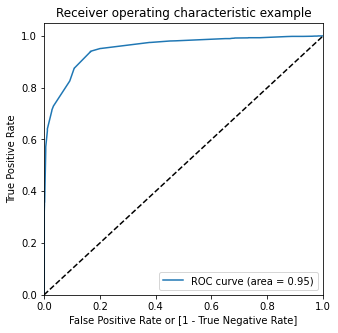

In [95]:
draw_roc(y_train_pred.Converted, y_train_pred.Converted_prob)

### Step 11: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [96]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Converted_prob,Converted,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.013599,0,5676,0,1,0,0,0,0,0,0,0,0,0
1,0.048290,0,6084,0,1,0,0,0,0,0,0,0,0,0
2,0.505326,0,1939,1,1,1,1,1,1,1,0,0,0,0
3,0.992662,1,4977,1,1,1,1,1,1,1,1,1,1,1
4,0.299606,0,4561,0,1,1,1,0,0,0,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379437  1.000000  0.000000
0.1   0.1  0.755411  0.974900  0.621207
0.2   0.2  0.856710  0.951512  0.798744
0.3   0.3  0.885498  0.875642  0.891524
0.4   0.4  0.876840  0.826013  0.907918
0.5   0.5  0.876840  0.826013  0.907918
0.6   0.6  0.876190  0.727895  0.966864
0.7   0.7  0.874026  0.713634  0.972096
0.8   0.8  0.873160  0.711352  0.972096
0.9   0.9  0.855844  0.639475  0.988141


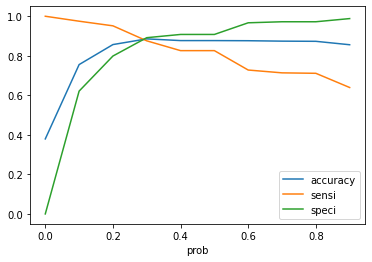

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [99]:
y_train_pred['final_predicted'] = y_train_pred.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred.head()

,Converted_prob,Converted,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.013599,0,5676,0,1,0,0,0,0,0,0,0,0,0,0
1,0.048290,0,6084,0,1,0,0,0,0,0,0,0,0,0,0
2,0.505326,0,1939,1,1,1,1,1,1,1,0,0,0,0,1
3,0.992662,1,4977,1,1,1,1,1,1,1,1,1,1,1,1
4,0.299606,0,4561,0,1,1,1,0,0,0,0,0,0,0,1


In [100]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred.Converted, y_train_pred.final_predicted)

0.874025974025974

In [101]:
confusion2 = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred.final_predicted)
confusion2

array([[2395,  472],
       [ 110, 1643]])

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9372504278379921

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.8353679804673875

In [105]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1646320195326125


In [106]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7768321513002364


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9560878243512974


#### Precision and Recall

In [108]:
from sklearn.metrics import precision_score, recall_score

In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred.Converted, y_train_pred.final_predicted)

0.874025974025974

In [110]:
precision = precision_score(y_train_pred.Converted,  y_train_pred.final_predicted)
precision

0.7768321513002364

In [111]:
recall = recall_score(y_train_pred.Converted,  y_train_pred.final_predicted)
recall

0.9372504278379921

In [112]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.8495346432264738

### Step 12: Making predictions on the test set

In [113]:
#Scaling test set
X_test_scaled = scaler.fit_transform(X_train)
X_test_scaled = pd.DataFrame(X_test, columns= X_train_5.columns)
X_test_scaled.drop('const', axis = 1, inplace=True)
X_test_scaled.index = X_test.index
X_test = X_test_scaled
X_test.head()

,Lead Source_Facebook,Lead Source_Welingak Website,Last Activity_SMS Sent,What matters most to you in choosing a course_Unknown Preference,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Modified
4269,0,0,1,1,0,0,0,0,0,0,0,0,0
2376,0,0,1,0,0,0,0,0,1,0,0,0,0
7766,0,0,0,0,0,0,0,0,1,0,0,0,0
9199,0,0,0,0,0,0,0,0,0,0,0,0,1
4359,0,0,0,0,0,0,0,0,1,0,0,0,0


In [114]:
X_test_sm = sm.add_constant(X_test)

In [115]:
X_train_5.columns

Index(['const', 'Lead Source_Facebook', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Unknown Preference',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [116]:
X_test_sm.columns

Index(['const', 'Lead Source_Facebook', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Unknown Preference',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

Making predictions on the test set

In [117]:
y_test_pred= res.predict(X_test_sm)
y_test_pred[:10]

4269    0.397667
2376    0.992662
7766    0.961282
9199    0.299606
4359    0.961282
9186    0.992662
1631    0.961282
8963    0.961282
8007    0.048290
5324    0.992662
dtype: float64

In [118]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
# Let's see the head
y_pred_1.head()

,0
4269,0.397667
2376,0.992662
7766,0.961282
9199,0.299606
4359,0.961282


In [120]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [121]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [122]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [123]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [124]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.397667
1,1,2376,0.992662
2,1,7766,0.961282
3,0,9199,0.299606
4,1,4359,0.961282


In [125]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [126]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob',], axis=1)

In [127]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,4269,1,0.397667
1,2376,1,0.992662
2,7766,1,0.961282
3,9199,0,0.299606
4,4359,1,0.961282


In [128]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [129]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,4269,1,0.397667,1
1,2376,1,0.992662,1
2,7766,1,0.961282,1
3,9199,0,0.299606,1
4,4359,1,0.961282,1


In [130]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[2210,  602],
       [  72, 1736]])

In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8541125541125542

In [132]:
precision = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
print('Precision score in test dataset:',precision)

Precision score in test dataset: 0.7425149700598802


In [133]:
recall = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
print('Recall score in test dataset:',recall)

Recall score in test dataset: 0.9601769911504425


In [134]:
F1 = 2 * (precision * recall) / (precision + recall)
print('F1 score in the test dataset:',F1)

F1 score in the test dataset: 0.8374336710082007


In [ ]:
X_test_sm

### Results

**We have selected the model 5**

**This has given us following scores in test set**
- Accuracy: 85 %
- Precision: 74 %
- Recall: 96 %
- F1 Score: 83.74 %